# Principal Component Analysis (PCA)

Principal component analysis (PCA) is a statistical procedure that uses an [orthogonal transformation](https://en.wikipedia.org/wiki/Orthogonal_transformation) to convert a set of observations of possibly correlated variables into a set of values of [linearly uncorrelated](https://en.wikipedia.org/wiki/Correlation_and_dependence) variables called principal components. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. This transformation is defined in such a way that the first principal component has the largest possible [variance](https://en.wikipedia.org/wiki/Variance) (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is [orthogonal](https://en.wikipedia.org/wiki/Orthogonal) the preceding components. The resulting vectors are an uncorrelated [orthogonal basis set](https://en.wikipedia.org/wiki/Orthogonal_basis_set). 

PCA is sensitive to the relative scaling of the original variables.

PCA was invented in 1901 by [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson) as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by [Harold Hotelling](https://en.wikipedia.org/wiki/Harold_Hotelling) in the 1930s.

PCA is mathematically defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read in the data and perform basic exploratory analysis

 ## Importing the dataset

In [ ]:
df = pd.read_csv('wine.data.csv')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Basic statistics

In [ ]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Below is an example of class seperation using two variables

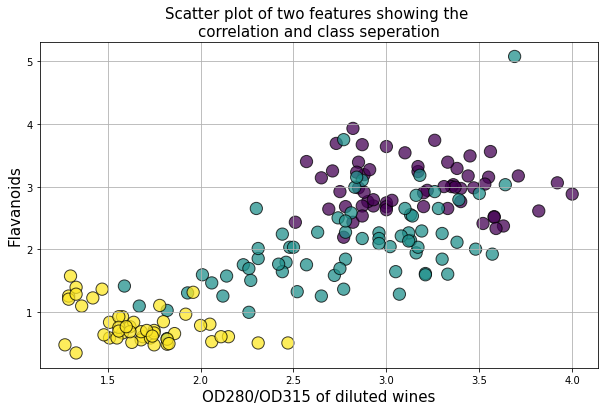

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

#### Are the features independent? Plot co-variance matrix

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.

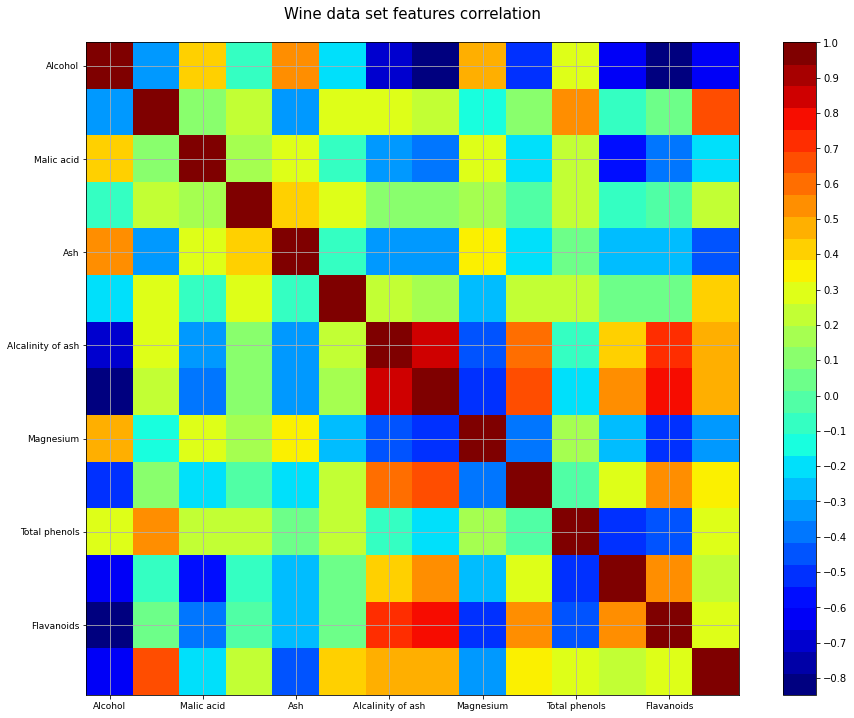

In [ ]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

### Data scaling
PCA requires scaling/normalization of the data to work properly

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [ ]:
dfx.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [ ]:
dfx.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


### PCA class import and analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)

In [ ]:
dfx_pca = pca.fit(dfx)

#### Plot the _explained variance ratio_

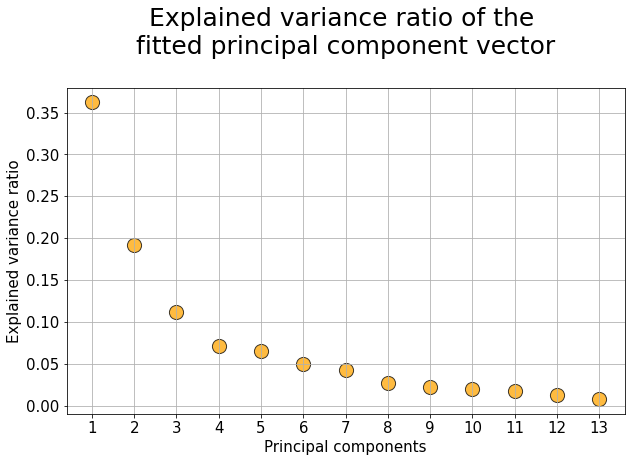

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**The above plot means that the $1^{st}$ principal component explains about 36% of the total variance in the data and the $2^{nd}$ component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.**

### Showing better class separation using principal components

#### Transform the scaled data set using the fitted PCA object

In [ ]:
dfx_trans = pca.transform(dfx)

#### Put it in a data frame

In [ ]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893,-0.152146,-0.101996,0.405585,-0.379433,0.145155
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934,-0.457016,1.016563,-0.442433,0.141230,-0.271778
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979,0.123370,0.735600,0.293555,0.379663,-0.110164
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,0.174107,-0.508933,-0.635249,0.142084
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580,0.230489,0.179420,0.012478,0.550327,-0.042455


#### Plot the first two columns of this transformed data set with the color set to original ground truth class label

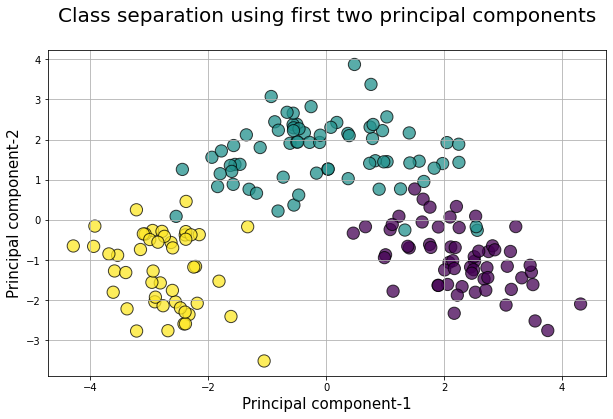

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

## Assignment

### Breast Cancer dataset

The Breast Cancer dataset (wdbc.data) is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign. The malignant class has 212 samples, whereas the benign class has 357 samples. It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.

##### Attribute information
- ID Number : It is not a feature. i.e. exclude the attribute, when you go for the experiment.
- Labels : Diagnosis (M = malignant, B = benign)
- 30 real-valued input features
- Number of instances: 569
- Missing attribute values: none
- Class distribution: 357 benign, 212 malignant

##  Q1. 
- Plot the correlation matrix.
- Plot the explained variance ratio.
- Examine PCA Projection to 2D and 3D and Plot the Principal Components.
- Visualize the cancer classes using the first two principal components through the scatter plot.
- Visualize the cancer classes using the first three principal components through the scatter plot.


##  Q2. 

 - Splitting the dataset into the Training set and Test set (75% : 25%)
 - Applying the PCA function into the training and testing set, where number of components is equal to 3.
 - Fitting Logistic Regression to the training set
 - Predict the test set result and draw the confusion matrix
 - Visualize the test set results through scatter plot 

Q1


In [9]:
#first load the data and see all the parameters
df = pd.read_csv('/content/wdbc.data')
df.head(10)

,'ID number','Diagnosis','mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points',...,'worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension'
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [10]:
df.iloc[:,1:].describe()

,'mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension',...,'worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension'
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


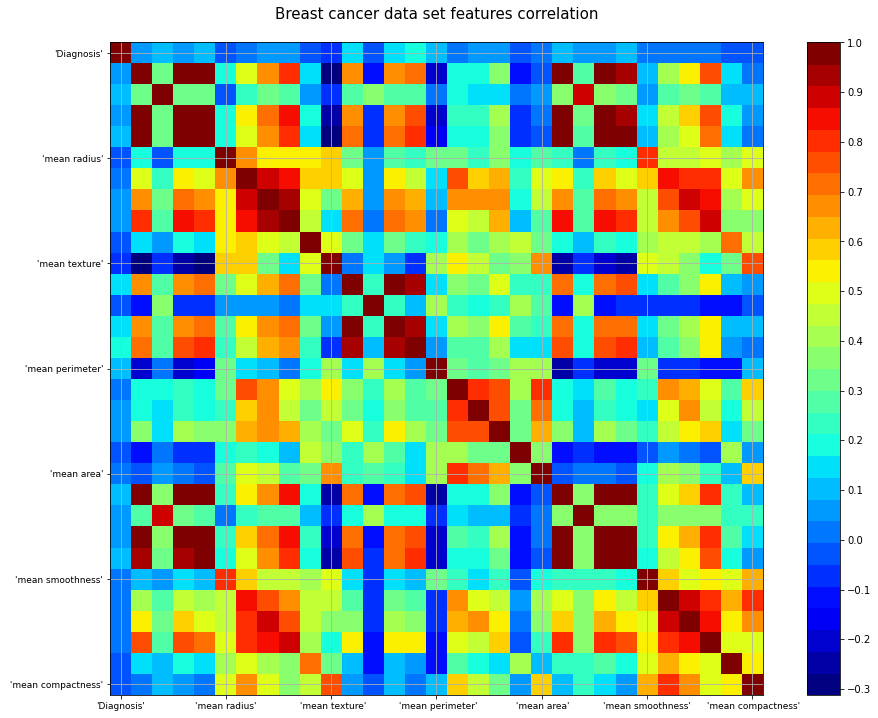

In [11]:
#correlation matrix 
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Breast cancer data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X = df.drop('\'Diagnosis\'',axis=1)
y = df['\'Diagnosis\'']

In [15]:
X = scaler.fit_transform(X)

In [16]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [17]:
dfx.head(10)

,'Diagnosis','mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry',...,'worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension'
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.236393,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,-0.236389,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,0.433000,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.236384,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,0.433343,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [18]:
dfx.describe()

,'Diagnosis','mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry',...,'worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension'
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,1.248757e-17,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.430790e-01,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-2.361897e-01,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.358950e-01,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,-1.725930e-01,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,7.052629e+00,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=None)

In [21]:
dfx_pca = pca.fit(dfx)

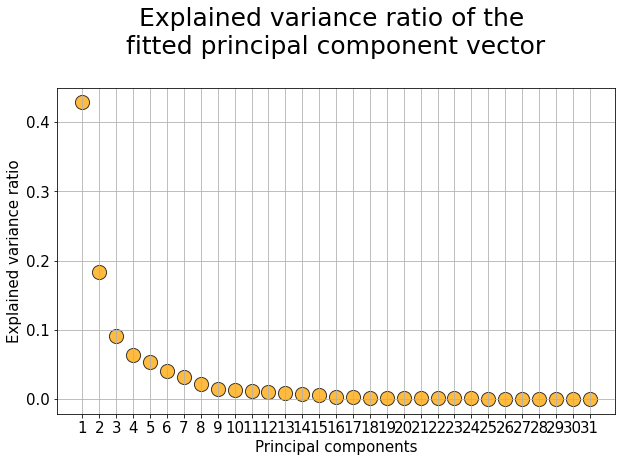

In [22]:
#explained variance ration
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [23]:
dfx_trans = pca.transform(dfx)

In [24]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,9.183200,1.971271,-1.171625,3.639332,-1.193098,-1.372280,0.371844,2.180529,-0.231610,-0.090396,...,0.107371,0.069634,0.085232,-0.175628,-0.150774,-0.200807,-0.253193,-0.033911,0.045572,-0.047166
1,2.383298,-3.753459,-0.580229,1.127438,0.624850,-0.126616,-0.288270,0.044935,0.426916,-0.659939,...,-0.075191,-0.091740,-0.213925,0.010368,-0.170210,-0.042420,0.180649,0.032630,-0.005902,-0.001845
2,5.742472,-1.080350,-0.533088,0.903470,-0.180601,-0.401855,0.463188,-0.715209,-0.010712,-0.082305,...,0.303285,-0.058930,-0.074145,0.103834,0.170749,0.005066,0.049887,0.047022,0.003290,0.000735
3,7.124384,10.272225,-3.150161,0.121512,-2.968055,-2.561668,1.950177,1.287990,1.272638,-1.171376,...,0.410865,-0.205120,-0.135322,0.158659,0.075684,-0.273048,0.184350,0.042465,-0.068640,-0.020001
4,3.945694,-1.959689,1.401177,2.937555,0.540853,1.233300,-0.205435,-0.959329,0.629119,-0.166354,...,-0.117341,-0.020423,0.135431,-0.004874,0.002884,0.039637,0.032586,-0.034790,0.005183,0.021199
5,2.371151,3.964910,-2.929342,0.925689,-1.061168,0.484059,-0.026803,0.500613,-0.095177,-0.113924,...,-0.004734,-0.101806,0.032088,0.003066,0.122371,-0.030111,-0.084575,0.000731,-0.019748,0.003464
6,2.233527,-2.674076,-1.675735,0.150643,0.041702,0.055813,-0.262267,-0.277779,0.126182,-0.034951,...,-0.050391,0.092008,-0.142087,-0.080329,-0.277539,-0.026946,0.020579,-0.046773,-0.013053,0.005482
7,2.151433,2.327691,-0.810728,-0.149408,-1.436901,1.367483,0.127457,0.953577,-0.755010,-0.044584,...,0.044933,-0.130115,-0.244772,0.099232,-0.196552,-0.058110,0.067452,0.026166,-0.002506,0.001661
8,3.165727,3.408826,-3.119277,-0.613053,-1.523496,-0.509189,0.172316,-0.207327,-0.809100,0.305970,...,0.094458,0.197483,-0.056220,-0.088511,0.130569,-0.055395,0.038030,0.037161,0.011669,0.005285
9,6.354960,7.723539,-4.238290,-3.417145,1.696804,1.028651,0.804560,2.441868,0.525614,-0.574000,...,-0.244534,-0.718339,0.161181,0.216699,0.134202,0.312018,-0.001354,0.135723,0.038117,0.003791


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


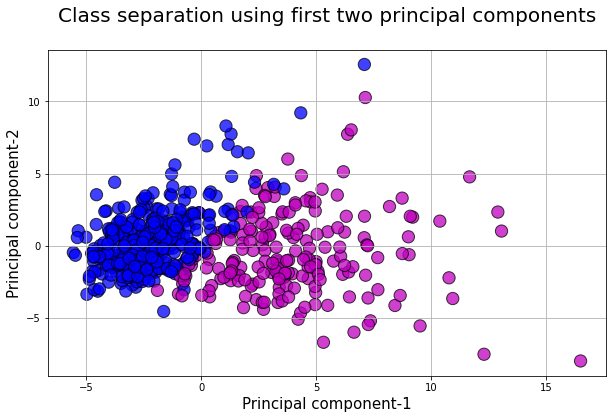

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df["'Diagnosis'"],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [26]:
from mpl_toolkits import mplot3d

In [27]:
z = dfx_trans[2]
x = dfx_trans[0]
y = dfx_trans[1]

<function matplotlib.pyplot.show(*args, **kw)>

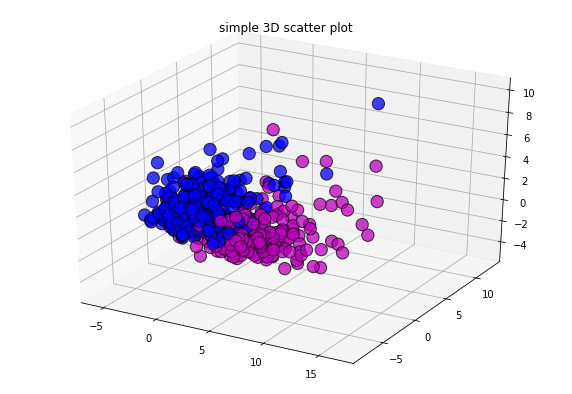

In [28]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z,c=df["'Diagnosis'"],edgecolors='k',alpha=0.75,s=150)
plt.title("simple 3D scatter plot")
 
# show plot
plt.show

In [29]:
pca = PCA(n_components=2)

In [30]:
dfx_pca = pca.fit(dfx)

In [31]:
dfx_trans = pca.transform(dfx)

In [32]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1
0,9.183200,1.971271
1,2.383298,-3.753459
2,5.742472,-1.080350
3,7.124384,10.272225
4,3.945694,-1.959689
5,2.371151,3.964910
6,2.233527,-2.674076
7,2.151433,2.327691
8,3.165727,3.408826
9,6.354960,7.723539


In [33]:
finalDf = pd.concat([dfx_trans, df[["'Diagnosis'"]]], axis = 1)

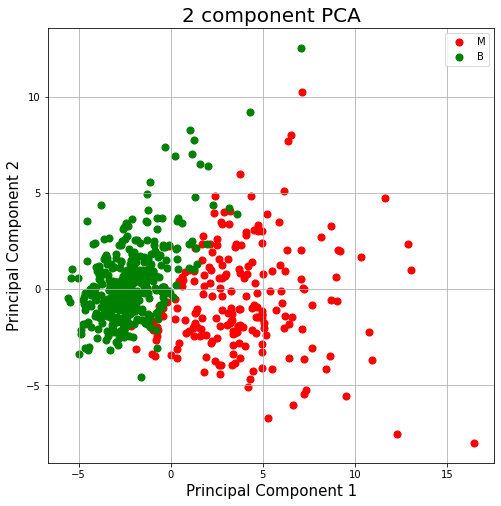

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M','B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf["'Diagnosis'"] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0], finalDf.loc[indicesToKeep, 1], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [35]:
pca = PCA(n_components=3)

In [36]:
dfx_pca = pca.fit(dfx)

In [37]:
dfx_trans = pca.transform(dfx)

In [38]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2
0,9.183200,1.971271,-1.171625
1,2.383298,-3.753459,-0.580229
2,5.742472,-1.080350,-0.533088
3,7.124384,10.272225,-3.150161
4,3.945694,-1.959689,1.401177
5,2.371151,3.964910,-2.929342
6,2.233527,-2.674076,-1.675735
7,2.151433,2.327691,-0.810728
8,3.165727,3.408826,-3.119277
9,6.354960,7.723539,-4.238290


In [39]:
finalDf = pd.concat([dfx_trans, df[["'Diagnosis'"]]], axis = 1)

In [40]:
x = dfx_trans[0]
y = dfx_trans[1]
z = dfx_trans[2]

<function matplotlib.pyplot.show(*args, **kw)>

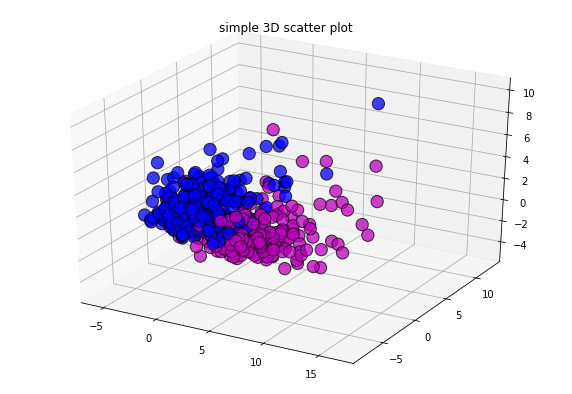

In [41]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z,c=df["'Diagnosis'"],edgecolors='k',alpha=0.75,s=150)
plt.title("simple 3D scatter plot")
 
# show plot
plt.show

Q2